In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow 
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


In [22]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD , RMSprop
from tensorflow.keras.optimizers import SGD , RMSprop
from tensorflow.keras.layers import Conv2D , BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
from tensorflow.keras.metrics import categorical_accuracy

In [7]:
input_path = r'C:/Users/Nishanth/Desktop/Python_Learning/CXR_Pneumonia detection/chest_xray/'

train_path = input_path+'train/'
val_path = input_path+'val/'
test_path = input_path+'test/'

In [13]:
gen = ImageDataGenerator()
train_batches = gen.flow_from_directory(train_path,model0.input_shape[1:3],color_mode="grayscale",shuffle=True,seed=1,
                                        batch_size=16)
valid_batches = gen.flow_from_directory(val_path, model0.input_shape[1:3],color_mode="grayscale", shuffle=True,seed=1,
                                        batch_size=16)
test_batches = gen.flow_from_directory(test_path, model0.input_shape[1:3], shuffle=False,
                                       color_mode="grayscale", batch_size=8)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model0 = Sequential()
model0.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(64,64,1)))
model0.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2,2)))
model0.add(Dropout(rate=0.25))
model0.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model0.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2,2)))
model0.add(Dropout(rate=0.25))
model0.add(Flatten())
model0.add(Dense(1024,activation="relu"))
model0.add(BatchNormalization())
model0.add(Dropout(rate=0.4))
model0.add(Dense(2, activation="softmax"))

In [ ]:
model0.compile(optimizer = 'adam',loss="categorical_crossentropy", metrics=["accuracy"])
model0.fit_generator(train_batches,validation_data=valid_batches,epochs=3)

Epoch 1/3
325/326 [============================>.] - ETA: 2s - loss: 0.1911 - accuracy: 0.9392

In [18]:
p = model0.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

78/78 [==============================] - 24s 311ms/step


In [23]:
recall_score(pre["label"],pre["pre"])

1.0

In [24]:
roc_auc_score(pre["label"],pre[1])

0.6213784790707868

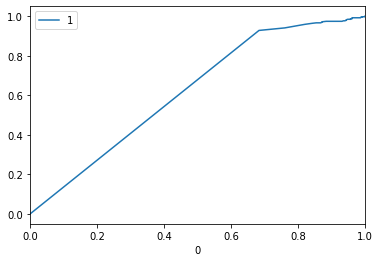

In [25]:
tpr,fpr,thres = roc_curve(pre["label"],pre[1])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)

In [34]:
##Saving the model 
model0.save("cnn_model.h5")
print("Saved model to disk")

Saved model to disk
